# Spatial graphs

- We visualize the decomposition of diffusion in different scales with a random walk matrix.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def layout(n_axes):
    cols = int(np.ceil(np.sqrt(n_axes)))
    rows = int(np.ceil(n_axes / cols))
    return rows, cols

[9.  6.4]


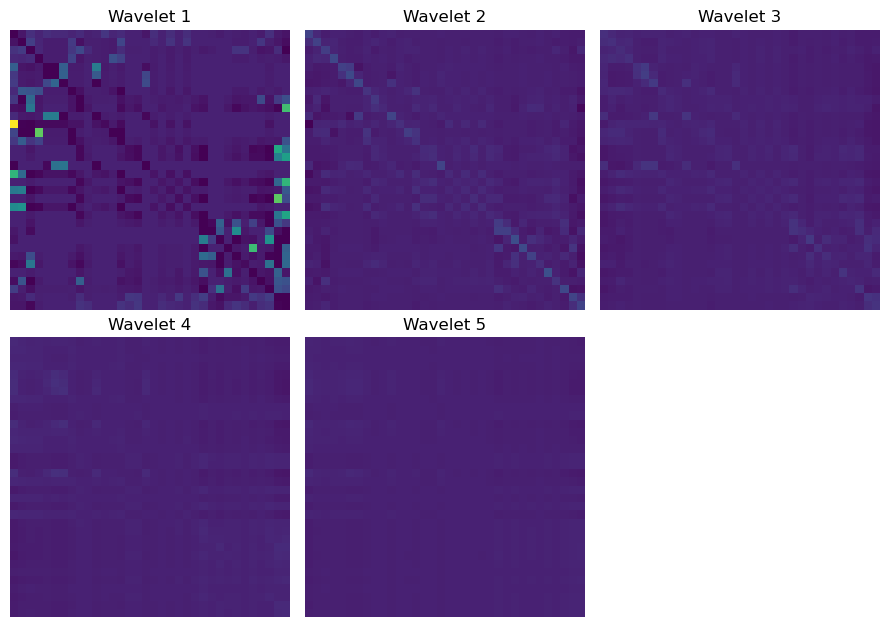

In [32]:
# Create a graph
G = nx.karate_club_graph()  # Example graph
A = nx.adjacency_matrix(G).toarray()  # Adjacency matrix
d = np.sum(A, axis=1)  # Degree vector

# compute Markov matrix
D_inv = np.diag(1 / d)
P = D_inv @ A

# compute diffusion
J = 5  # number of wavelets
diffusions = np.stack([np.linalg.matrix_power(P, pow(2, j)) for j in range(J + 1)])
wavelets = np.stack([diffusions[j] - diffusions[j + 1] for j in range(J)])
rows, cols = layout(J)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3.2), squeeze=False)

print(fig.get_size_inches())
for j, (wavelet, ax) in enumerate(zip(wavelets, axes.flat)):
    sns.heatmap(
        wavelet, ax=ax, cmap="viridis", vmax=1, vmin=-0.1, cbar=False, square=True
    )
    ax.set_title(f"Wavelet {j + 1}")

for ax in axes.flat:
    ax.axis("off")

fig.tight_layout()
fig.show()